## Stimuli for Psychophysics Experiments based on spatio-temporal fourier representation

In [34]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'dpi' : 200} #plotting pretty

import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.fftpack
import scipy.signal
from scipy import interpolate
#from tqdm import tqdm_notebook
import imp as imp

import utils.getstim as getstim
import utils.imtools as imtools
import utils.fouriertools as ftools
import utils.wavelettools as wtools

Max stimulus resolution when viewed at 2°: 270.0 CPD


/home/vasha/research/wavelet_stim/utils/fouriertools.py:609: RuntimeWarning: divide by zero encountered in log10
  


ValueError: not enough values to unpack (expected 2, got 0)

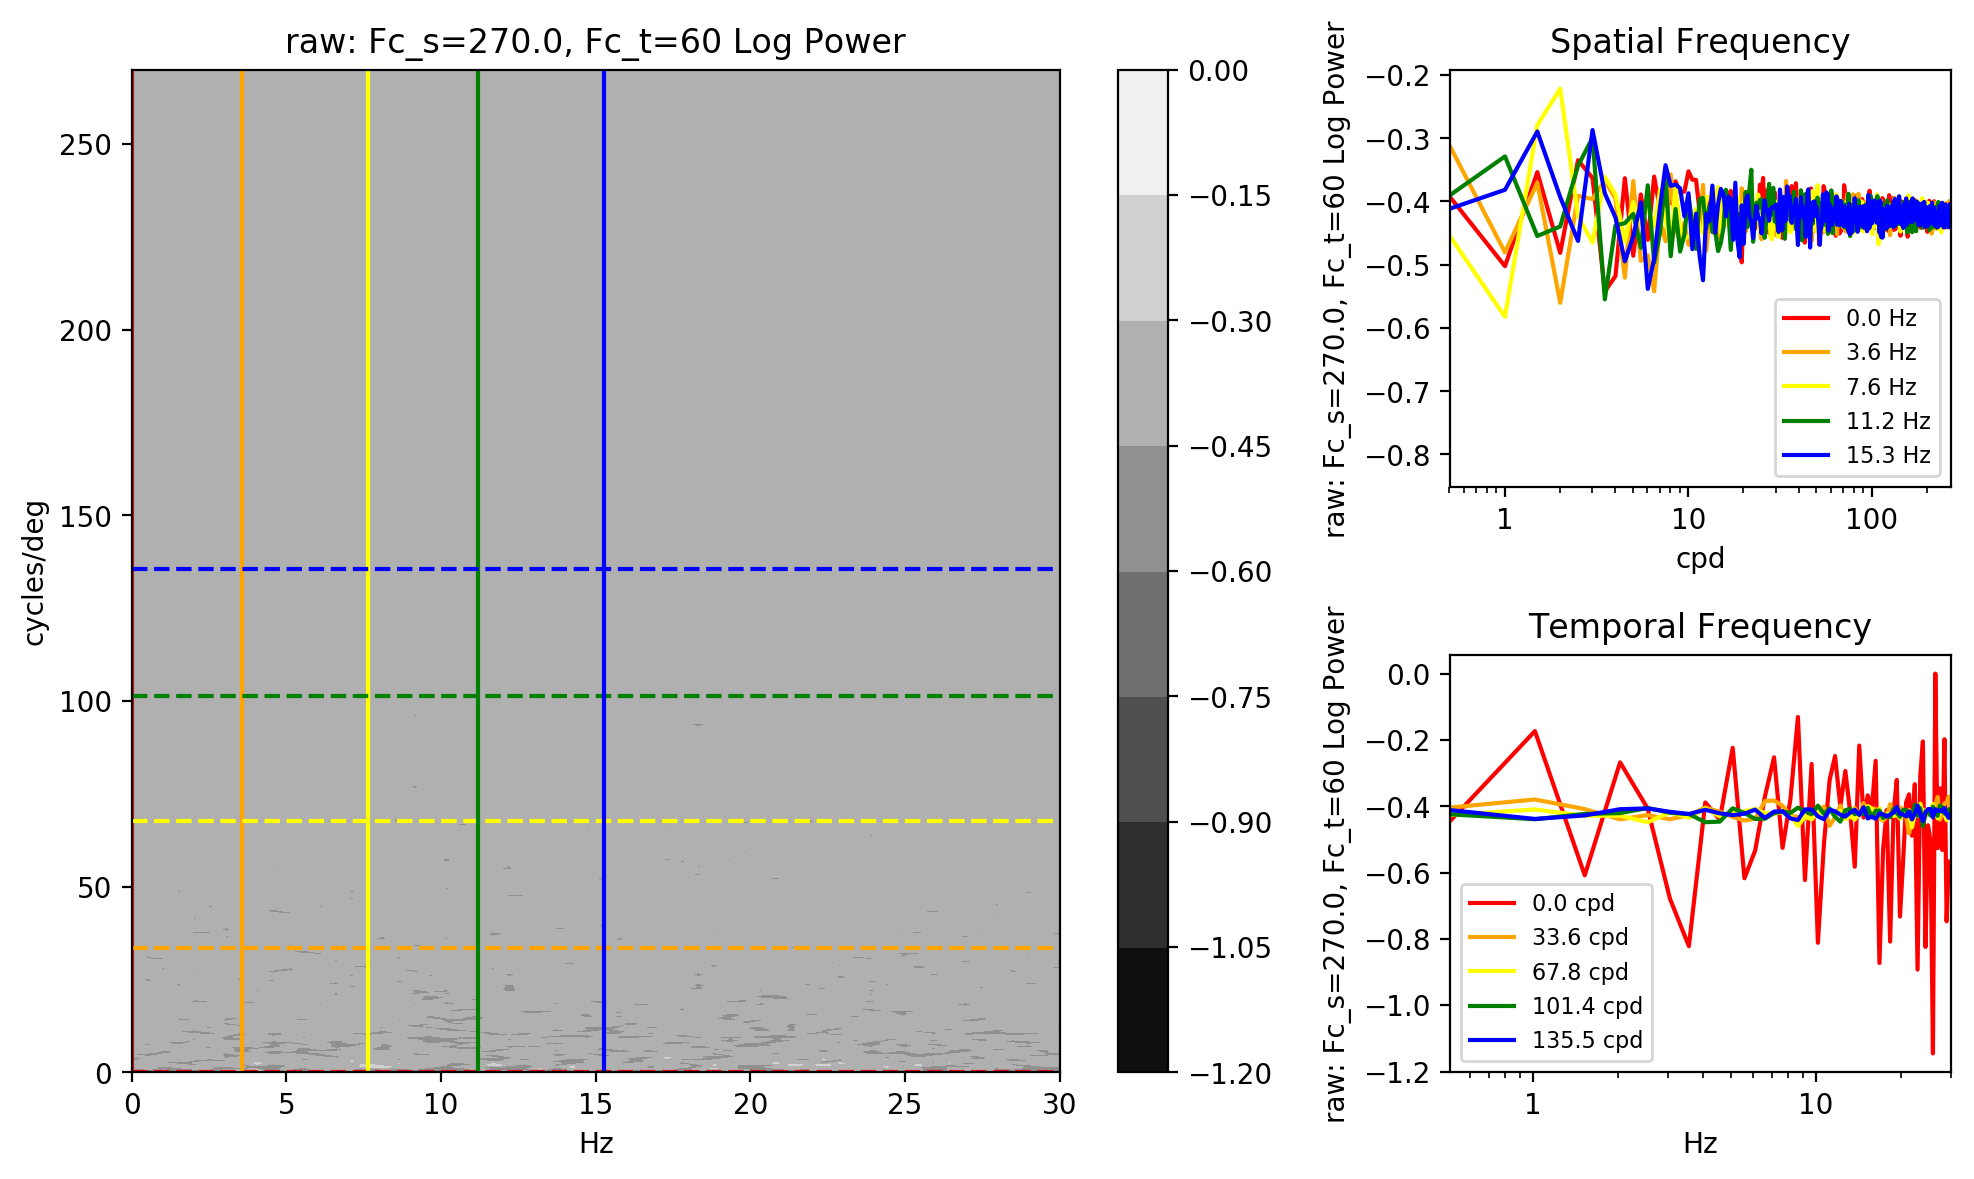

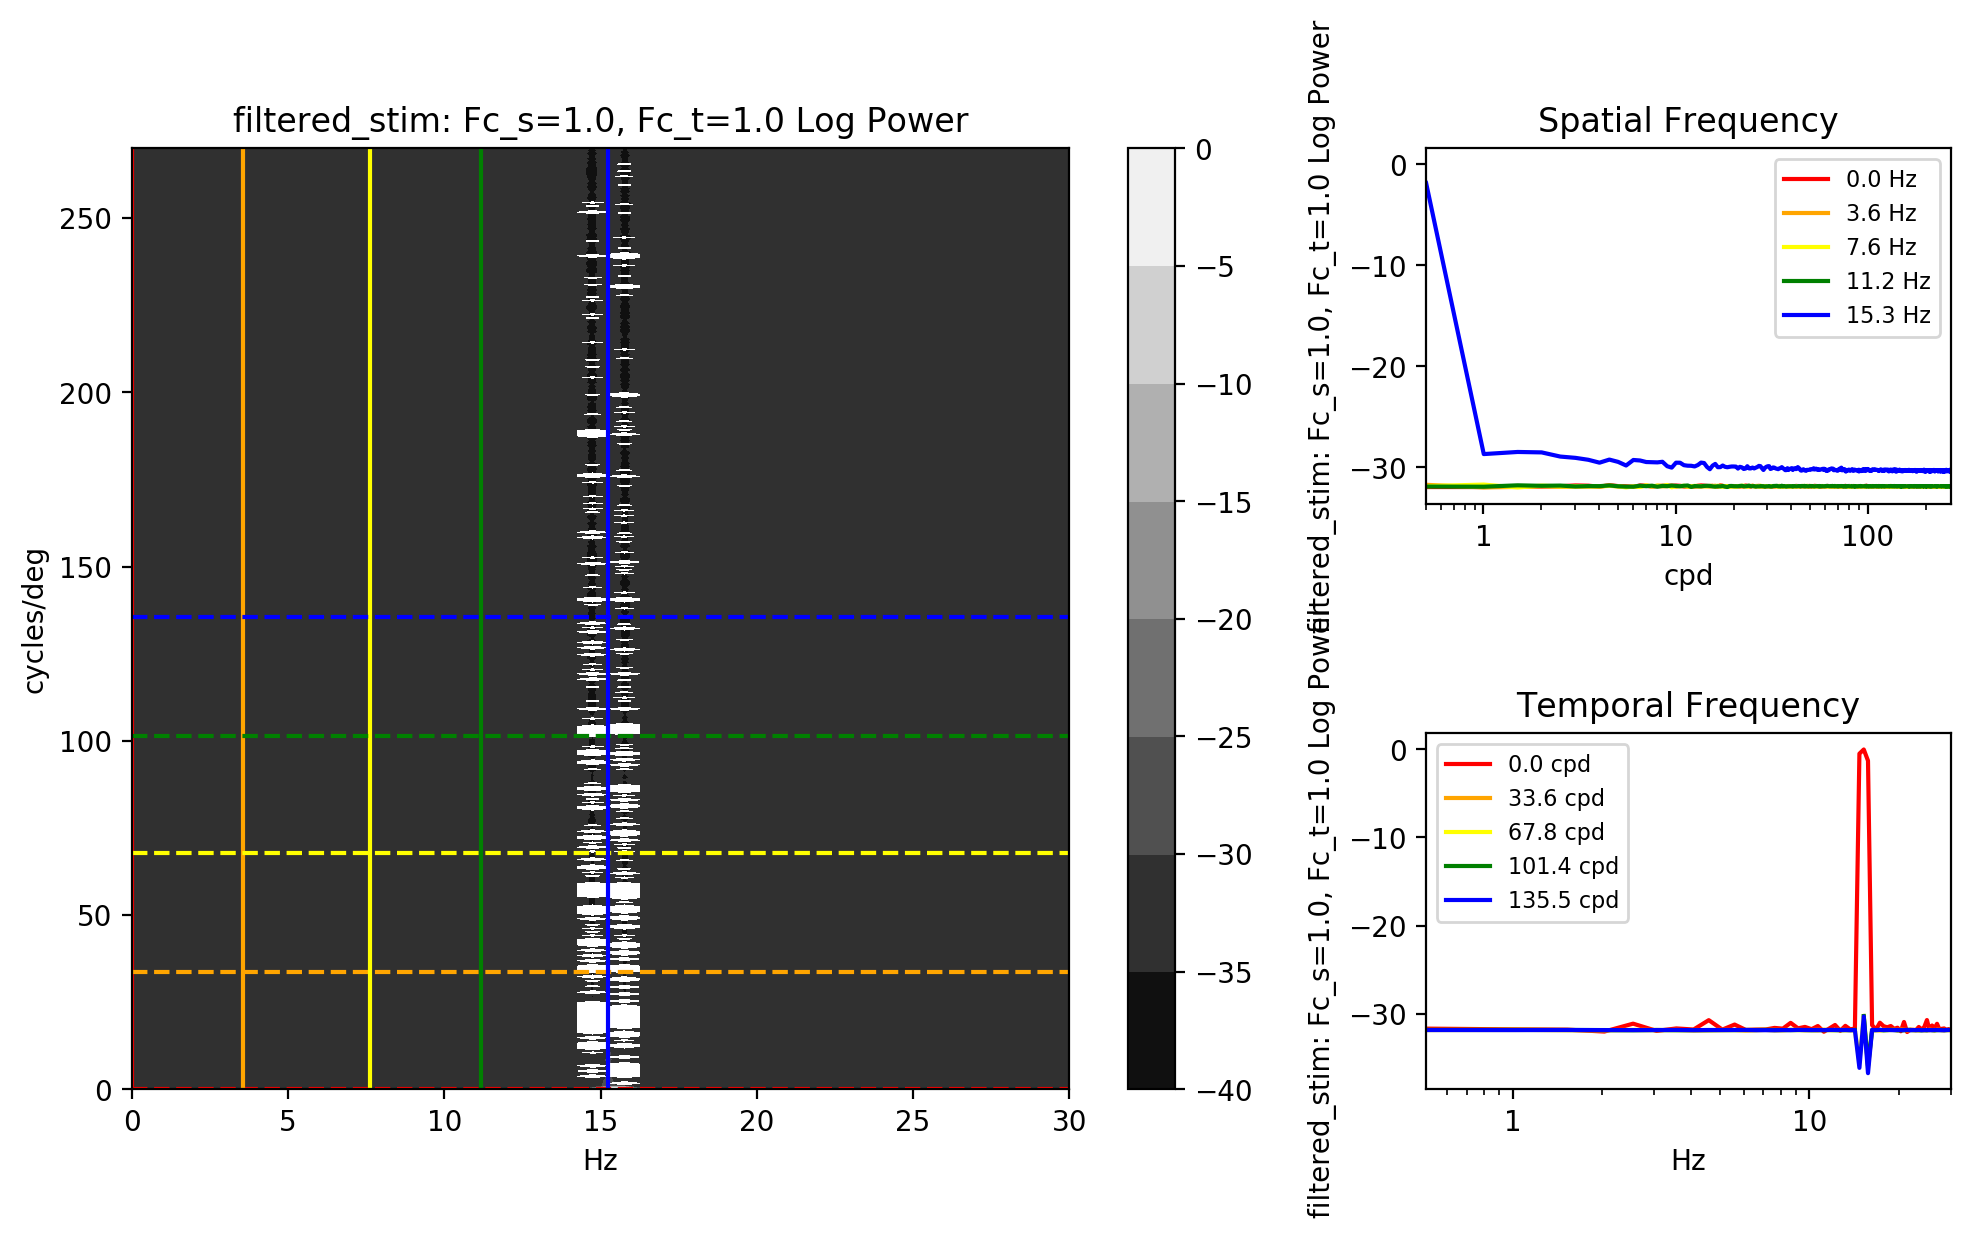

In [39]:
imp.reload(getstim)
imp.reload(ftools)

# stimulus parameters
# spatial
stim_deg = 2
stim_px_w = 1080
stim_px_h = 1080
# temporal
stim_secs = 1
stim_fps = 60

# calc cpd
stim_cpd = (stim_px_w/2)/stim_deg
# calc frames per second
stim_cps = stim_fps/2 #this is our nyquist
stim_frames = stim_fps * stim_secs

print(f'Max stimulus resolution when viewed at {stim_deg}°: {stim_cpd:.1f} CPD')
spatial_cutoffs = np.arange(1,stim_cpd, stim_cpd//3)
temporal_cutoffs = np.arange(1,stim_cps, stim_cps//3)
#spatial_cut_offs = [np.sqrt(2)*stim_fps, stim_fps, 250, 220, 200, 180, 150, 120, 100, 50, 10, 5, 1]

# generate stimuli
step_stim = getstim.step_stim(stim_px_w, stim_px_h, len_frames=stim_frames)
randstim = imtools.rescale_255(np.random.rand(*np.shape(step_stim)))

getstim.generate_spatiotemporal_filtered_stims(randstim, stim_cpd, spatial_cutoffs, stim_fps, temporal_cutoffs, filt='sharp', stim_type='randnoise')
getstim.generate_spatiotemporal_filtered_stims(randstim, stim_cpd, spatial_cutoffs, stim_fps, temporal_cutoffs, filt='cosine_step', stim_type='randnoise')
#getstim.generate_spatiotemporal_filtered_stims(step_stim, stim_cpd, spatial_cuttoffs, stim_fps, temporal_cut_offs, filt='sharp', stim_type='stepfun')
#getstim.generate_spatiotemporal_filtered_stims(step_stim, stim_cpd, spatial_cuttoffs, stim_fps, temporal_cut_offs, filt='cosine_step', stim_type='stepfun')
#getstim.generate_spatiotemporal_filtered_stims(step_stim, stim_cpd, spatial_cuttoffs, stim_fps, temporal_cut_offs, filt='gauss_step', stim_type='stepfun')
#getstim.generate_spatiotemporal_filtered_stims(step_stim, stim_cpd, spatial_cuttoffs, stim_fps, temporal_cut_offs, filt='gauss_taper', stim_type='stepfun')

In [ ]:
#for frame in step_stim:
#    plt.imshow(frame)
#    plt.show()